<a href="https://colab.research.google.com/github/YuChengHSU/cc_report/blob/main/RSC_network.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Install packages and loadiing datasets
! pip install networkx teneto
# Clone the entire repo.
!git clone -l -s https://github.com/YuChengHSU/cc_report.git cloned-repo
%cd cloned-repo

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 32.0/32.0 MB 7.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.6/9.6 MB 44.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.9/14.9 MB 21.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 455.4/455.4 KB 11.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.3/3.3 MB 19.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 96.6/96.6 KB 3.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 125.2/125.2 KB 6.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 11.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 68.2/68.2 KB 3.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for docopt: filename=docopt-0.6.2-py2.py3-none-any.whl size=13723 sha256=fcca1d692da997f778c700ad14e313a34e32c2029e475af78f3

In [14]:
#@title Import library and code {display-mode: "form"}
#@markdown For the following part,
#@markdown  you just need to press the "play" button at the left or made
#@markdown the change you wish and press the "play" button.

from IPython.display import clear_output 
import pandas as pd
import networkx as nx
import numpy as np
import scipy.stats as ss
import matplotlib
import matplotlib.pyplot as plt
import teneto as tnx
import teneto as tnx
import datetime as dt
import json
import os as os
import ipywidgets as widgets
style = {'description_width': 'initial'}

adj_f=np.load("female_suicide_r.npy",allow_pickle=True)
adj_m=np.load("male_suicide_r.npy",allow_pickle=True)
adj_f02=np.load("female_suicide_r_2002.npy",allow_pickle=True)
adj_m02=np.load("male_suicide_r_2002.npy",allow_pickle=True)
label=list(reversed(["mental","Physical","Abuse","Finanical","Work","School","Relationship","Family"]))
gp=[    '0-19', 
        '20-39',
        '40-59',
        '60-79',
        '80+']
pop_table=pd.read_csv("pop_table")
m_tnet = tnx.TemporalNetwork(from_array=adj_m, nettype='wu',
                           nodelabels=label,timelabels=gp,
                           diagonal=True)

f_tnet = tnx.TemporalNetwork(from_array=adj_f, nettype='wu',
                           nodelabels=label,timelabels=gp,
                           diagonal=True)
      
## Simulating result
def simulate(b):
  clear_output()
  display(button)
  if togg.value=='current_HK':
    pop_15.value = 837.39 
    pop_15_ratio.value = 0.516685

    pop_24.value = 796.34 
    pop_24_ratio.value = 0.503272
    pop_39.value = 1674.29
    pop_39_ratio.value = 0.416986
    pop_59.value = 2436.91  
    pop_59_ratio.value = 0.448213
    pop_60.value = 1672.34 
    pop_60_ratio.value = 0.475234

  elif togg.value== 'HK_2050':
    pop_15.value = 8004.4*0.075 
    pop_15_ratio.value = 0.5190
    pop_24.value = 8004.4*0.067  
    pop_24_ratio.value = 0.4874 
    pop_39.value = 8004.4*0.195  
    pop_39_ratio.value = 0.4015
    pop_59.value = 8004.4*0.262   
    pop_59_ratio.value = 0.4084
    pop_60.value = 8004.4*0.33   
    pop_60_ratio.value = 0.4881 

  elif togg.value=='outflow_0.1_HK':
    pop_15.value = 837.39 
    pop_15_ratio.value = 0.516685

    pop_24.value = 796.34 
    pop_24_ratio.value = 0.503272
    pop_39.value = 1674.29*0.9
    pop_39_ratio.value = 0.416986
    pop_59.value = 2436.91*0.9  
    pop_59_ratio.value = 0.448213
    pop_60.value = 1672.34 
    pop_60_ratio.value = 0.475234


  elif togg.value=='HK_2006':
    pop_15.value = 939.675 
    pop_15_ratio.value = 0.5156
    pop_24.value = 909.005 
    pop_24_ratio.value = 0.4931
    pop_39.value = 1629.486
    pop_39_ratio.value = 0.4358
    pop_59.value = 2287.585 
    pop_59_ratio.value = 0.4845
    pop_60.value = 1098.595
    pop_60_ratio.value = 0.4749    
  pop=np.array([pop_15.value,pop_24.value,pop_39.value,pop_59.value,pop_60.value])
  ratio=np.array([pop_15_ratio.value,pop_24_ratio.value,pop_39_ratio.value,pop_59_ratio.value,pop_60_ratio.value])

  sudo_adj_matrix=np.zeros((8,8,5))
  sudo_adj_matrix=adj_m*pop*ratio+adj_f*pop*(1-ratio)
  if  togg.value=='sars_crisis':
    sudo_adj_matrix=adj_m02*pop*ratio+adj_f02*pop*(1-ratio)

  tot_tnet = tnx.TemporalNetwork(from_array=sudo_adj_matrix, nettype='wu',
                            nodelabels=label,timelabels=gp,
                            diagonal=True,dense_threshold=9)
  sudo_table=pop_table.copy()
  sudo_table.iloc[1,1:]=pop*ratio
  sudo_table.iloc[0,1:]=pop*(1-ratio)
  print("Demographic decomposition")
  print(sudo_table)
  fig0,ax0=plt.subplots(nrows=1,ncols=2,sharey=True,figsize=(12,6))
  fig1,ax1=plt.subplots(nrows=5,ncols=1,figsize=(12,15),sharex=True)

  tot_tnet.plot('slice_plot',timelabels=['Below 15','15-24','25-39','40-59','60+'],
                ax=ax0[0],plotedgeweights=True,edgeweightscalar=0.005
              )
  ax0[0].set_xlabel("group")
  ax0[0].set_ylabel("Death cause")
  ax0[0].set_yticklabels(label)
  ax0[0].set_title("Simulated population suicide cause network")

  adj_tot_norm=np.sum(sudo_adj_matrix,axis=-1)
  adj_tot_norm=adj_tot_norm/np.sum(np.tril(adj_tot_norm))

  nx_tot=nx.from_numpy_array(adj_tot_norm)

  nx_tot=nx.relabel_nodes(nx_tot,{i:label[i] for i in range(len(label))})
  eigen_tot=nx.eigenvector_centrality(nx_tot,weight='weight',max_iter=500)
  ax0[1].barh(y=list(eigen_tot.keys()),width=eigen_tot.values())
  ax0[1].set_title("Simulated population population Eigen-centrality")
  fig0.savefig(togg.value+".png")
  for gpx in range(5):
    adj_tot_norm=sudo_adj_matrix[:,:,gpx]

    adj_tot_norm=adj_tot_norm/np.sum(np.tril(adj_tot_norm))

    nx_tot=nx.from_numpy_array(adj_tot_norm)

    nx_tot=nx.relabel_nodes(nx_tot,{i:label[i] for i in range(len(label))})
    eigen_tot=nx.eigenvector_centrality(nx_tot,weight='weight',max_iter=500)

    ax1[gpx].bar(eigen_tot.keys(),eigen_tot.values())
    ax1[gpx].set_title("Simulated group:"+gp[gpx]+" Eigen centrality")



In [15]:
#@title # Simulating sucidide cause with different demographical composition from Hong Kong Coroner's court report{display-mode: "form"}
#@markdown ---
#@markdown This work sheet enable you to adjust the demographic stuctures and simulate the change of major suicide cause.
#@markdown ## Underlying suicide cause estimation method
#@markdown The underlying suicide cause was estimated from Hong Kong Coroner's report from 2011~2019. This period of the time Hong Kong overall suicide rate keeps in a stable trend and thus being modeled. 

#@markdown You can either choose a scenario t osimultae or adjust the population structure to see the result.


pop_15=widgets.BoundedFloatText(
    value=837.39,
    min=0,
    step=0.1,
    max=9999,
    description='Population (k)',
    style=style,
    disabled=False
)
pop_15_ratio=widgets.FloatSlider(
    value=0.516685,
    min=0, # max exponent of base
    max=1, # min exponent of base
    step=0.01, # exponent step
    description='Male/ total population',
    style=style
)
pop_24=widgets.BoundedFloatText(
    value=716.706,
    min=0,
    step=0.1,
    max=9999,
    description='Population (k)',
    style=style,
    disabled=False
)
pop_24_ratio=widgets.FloatSlider(
    value=0.503272,
    min=-0, # max exponent of base
    max=1, # min exponent of base
    step=0.01, # exponent step
    description='Male/ total population',
    style=style
)
pop_39=widgets.BoundedFloatText(
    value=1506.861,
    min=0,
    max=9999,
    step=0.1,
    description='Population (k)',
    style=style,
    disabled=False
)
pop_39_ratio=widgets.FloatSlider(
    value=0.416986,
    min=-0, # max exponent of base
    max=1, # min exponent of base
    step=0.01, # exponent step
    description='Male/ total population',
    style=style
)
pop_59=widgets.BoundedFloatText(
    value=2436.91,
    min=0,
    max=9999,
    step=0.1,
    description='Population (k)',
    style=style,
    disabled=False
)
pop_59_ratio=widgets.FloatSlider(
    value=0.448213,
    min=-0, # max exponent of base
    max=1, # min exponent of base
    step=0.01, # exponent step
    description='Male/ total population',
    style=style
)
pop_60=widgets.BoundedFloatText(
    value=1672.34,
    min=0,
    max=9999,
    step=0.1,
    description='Population (k)',
    style=style,
    disabled=False
)
pop_60_ratio=widgets.FloatSlider(
    value=0.475234,
    min=-0, # max exponent of base
    max=1, # min exponent of base
    step=0.01, # exponent step
    description='Male/ total population',
    style=style
)

tab = widgets.Tab()
tab.children=[widgets.VBox([pop_15,pop_15_ratio]),
              widgets.VBox([pop_24,pop_24_ratio]),
              widgets.VBox([pop_39,pop_39_ratio]),
              widgets.VBox([pop_59,pop_59_ratio]),
              widgets.VBox([pop_60,pop_60_ratio])
              ]
tab.set_title(index=0,title="Below 15")
tab.set_title(index=1,title="15~24")
tab.set_title(index=2,title="25~39")
tab.set_title(index=3,title="40~59")
tab.set_title(index=4,title="60 or above")

togg=widgets.ToggleButtons(
    options=['None',"current_HK",'outflow_0.1_HK','HK_2006','sars_crisis', "HK_2050",],
    description='Scenario:',
    disabled=False,
    button_style='', # 'success', 'info', 'warning', 'danger' or ''
    tooltips=['No scenario is chosen, you can adjust the population below', 
              'Using current Hong Kong demographic data',
              'Assume 10% of Hong Kong workforce(25~59) outflow',
              'Using 2006 Hong Kong demographic data',
              "Using SARS suicide rate (You can still adjyst the population structure below)",
              'Using 2050 projected Hong Kong demographic data',],
#     icons=['check'] * 3
)

accordion = widgets.Accordion(children=[togg,tab])
accordion.set_title(0,'Scenario')
accordion.set_title(1,'Population structure')

display(accordion)



Accordion(children=(ToggleButtons(description='Scenario:', options=('None', 'current_HK', 'outflow_0.1_HK', 'H…

Button(description='Simulate', style=ButtonStyle())

Demographic decomposition
  Sex        0-19       20-39       40-59        60-79         80+
0   F  404.723148  356.007938  878.521059  1344.655258  877.587172
1   M  432.666852  360.698062  628.339941  1092.254742  794.752828


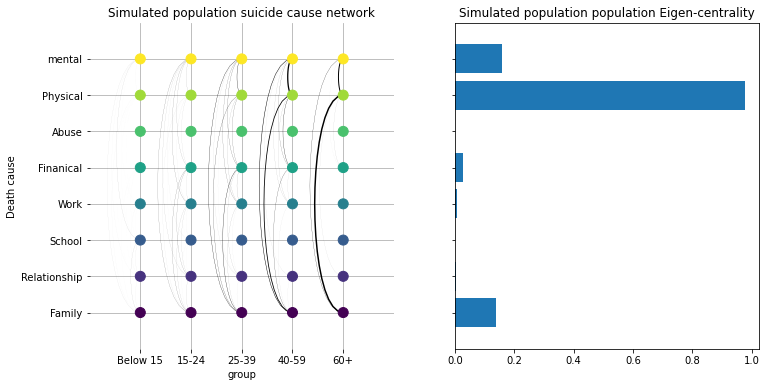

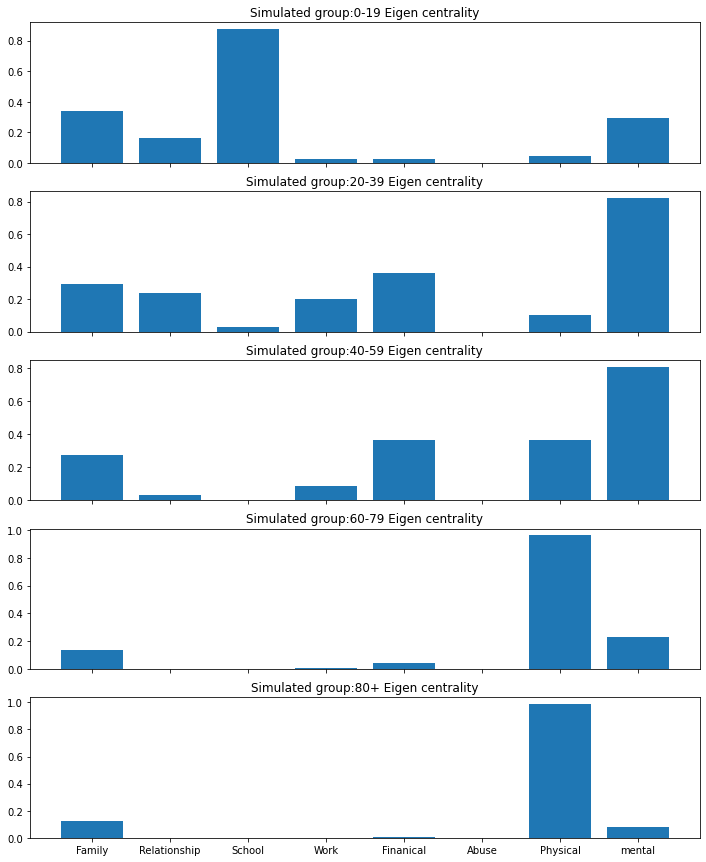

In [16]:
#@title ## Simulating the result
#@markdown ---

button=widgets.Button(description="Simulate")
button.on_click(simulate)
button

# Visualization of Hong Kong suicide cause 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  after removing the cwd from sys.path.


Text(0.5, 1.0, 'Hong Kong suicide cause network Eigen-centrality')

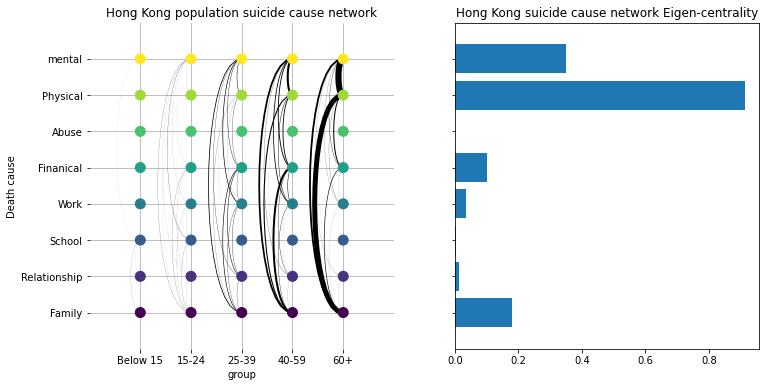

In [ ]:
#@title Visualization: Networks for overall Hong Kong population  {display-mode: "form"}

tot_adj_matrix=np.zeros((8,8,5))
tot_adj_matrix=adj_m*np.array(pop_table.iloc[1,1:],dtype=np.float)+adj_f*np.array(pop_table.iloc[0,1:],dtype=np.float)
tot_tnet = tnx.TemporalNetwork(from_array=tot_adj_matrix, nettype='wu',
                           nodelabels=label,timelabels=gp,
                           diagonal=True,dense_threshold=9)


fig,ax=plt.subplots(nrows=1,ncols=2,sharey=True,figsize=(12,6))
tot_tnet.plot('slice_plot',timelabels=['Below 15','15-24','25-39','40-59','60+'],
              ax=ax[0],plotedgeweights=True,edgeweightscalar=0.003
             )
ax[0].set_xlabel("group")
ax[0].set_ylabel("Death cause")
ax[0].set_yticklabels(label)
ax[0].set_title("Hong Kong population suicide cause network")

adj_tot_norm=np.sum(sudo_adj_matrix,axis=-1)
adj_tot_norm=adj_tot_norm/np.sum(np.tril(adj_tot_norm))

nx_tot=nx.from_numpy_matrix(adj_tot_norm)

nx_tot=nx.relabel_nodes(nx_tot,{i:label[i] for i in range(len(label))})
eigen_tot=nx.eigenvector_centrality(nx_tot,weight='weight',max_iter=500)
ax[1].barh(y=list(eigen_tot.keys()),width=eigen_tot.values())
ax[1].set_title("Hong Kong suicide cause network Eigen-centrality")



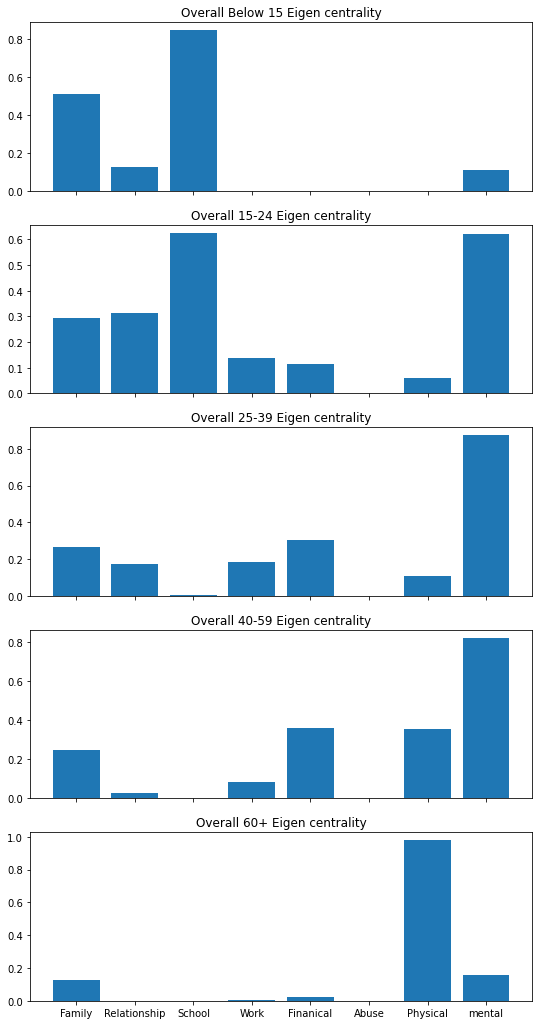

In [ ]:

#@title # Visualization: eigen-centrality between different age  {display-mode: "form"}
#@markdown This visualize the importance of the cause at different age-group

fig,ax=plt.subplots(nrows=5,ncols=1,figsize=(9,18),sharex=True)
for gpx in range(5):
  adj_tot_norm=tot_adj_matrix[:,:,gpx]

  adj_tot_norm=adj_tot_norm/np.sum(np.tril(adj_tot_norm))

  nx_tot=nx.from_numpy_matrix(adj_tot_norm)

  nx_tot=nx.relabel_nodes(nx_tot,{i:label[i] for i in range(len(label))})
  eigen_tot=nx.eigenvector_centrality(nx_tot,weight='weight',max_iter=500)

  ax[gpx].bar(eigen_tot.keys(),eigen_tot.values())
  ax[gpx].set_title("Overall "+gp[gpx]+" Eigen centrality")

## Findings
We can observe that the major suicide cause in different age groups varies with different consideration. Youngsters below 15 suffer from school issue, and gradually the combination of mental and school issue play significant role in 15~24 age groups. After 25, mental issue takes the major until 60 years old that physical issue dominates the suicide cause. 

 # Visualization: Suicide cause networks among different age and gender 

Text(0, 0.5, '')

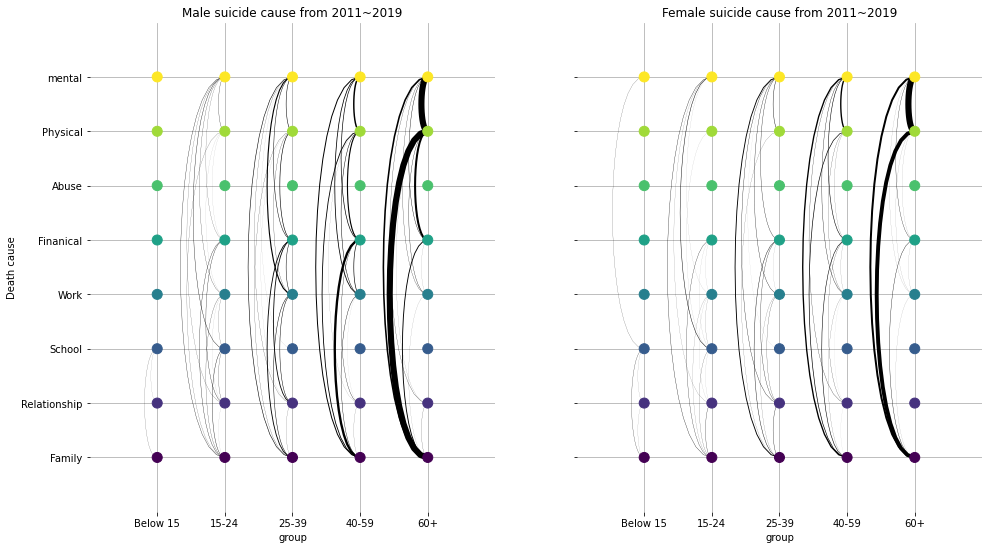

In [ ]:
#@title Visualization: Networks between different age and gender {display-mode: "form"}

fig,ax=plt.subplots(nrows=1,ncols=2,sharey=True,figsize=(16,9))
m_tnet.plot('slice_plot',timelabels=gp,ax=ax[0],plotedgeweights=True,edgeweightscalar=5)
f_tnet.plot('slice_plot',timelabels=gp,ax=ax[1],plotedgeweights=True,edgeweightscalar=5)

ax[0].set_xlabel("group")
ax[0].set_title("Male suicide cause from 2011~2019")
ax[0].set_ylabel("Death cause")
ax[0].set_yticklabels(label)

ax[1].set_title("Female suicide cause from 2011~2019")
ax[1].set_xlabel("group")
ax[1].set_ylabel(None)




0
1
2
3
4


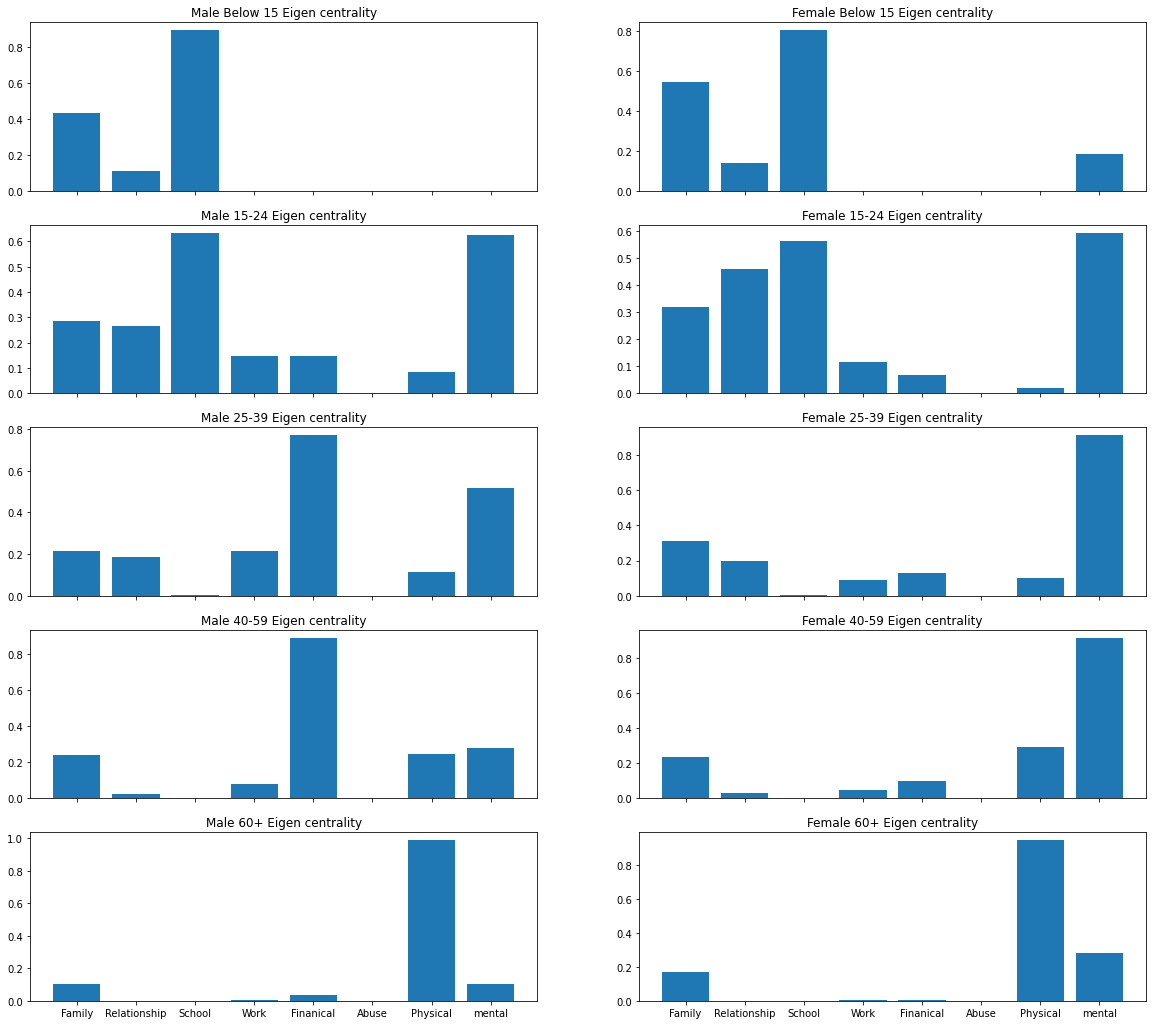

In [ ]:

#@title Visualization: eigen-centrality between different age  {display-mode: "form"}
#@markdown This visualize the importance of the cause at different age-group

fig,ax=plt.subplots(nrows=5,ncols=2,figsize=(20,18),sharex=True)
for gpx in range(5):
  print(gpx)
  adj_m_norm=adj_m[:,:,gpx]*pop_table.iloc[1,gpx+1]
  adj_f_norm=adj_f[:,:,gpx]*pop_table.iloc[0,gpx+1]

  adj_m_norm=adj_m_norm/np.sum(adj_m_norm)
  adj_f_norm=adj_f_norm/np.sum(adj_f_norm)

  nx_m=nx.from_numpy_matrix(adj_m_norm)
  nx_f=nx.from_numpy_matrix(adj_f_norm)

  nx_m=nx.relabel_nodes(nx_m,{i:label[i] for i in range(len(label))})
  nx_f=nx.relabel_nodes(nx_f,{i:label[i] for i in range(len(label))})
  eigen_m=nx.eigenvector_centrality(nx_m,weight='weight',max_iter=500)
  eigen_f=nx.eigenvector_centrality(nx_f,weight='weight',max_iter=500,tol=1e-5)

  ax[gpx,0].bar(eigen_m.keys(),eigen_m.values())
  ax[gpx,0].set_title("Male "+gp[gpx]+" Eigen centrality")
  ax[gpx,1].bar(eigen_f.keys(),eigen_f.values())
  ax[gpx,1].set_title("Female "+gp[gpx]+" Eigen centrality")



## Findings
We can observe that the major suicide cause in different gender groups also varies with different consideration. The major difference is that in the mid-age (25-59) Male suffers more on financial concerns, but female majorly suffers from mental issue.  